In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_1 = pd.read_csv('/content/2006-07 table 8 final merged.csv')
df_2 = pd.read_csv('/content/2006-07 table 9c final merged.csv')
df_3 = pd.read_csv('/content/2011-12 table 8 final merged.csv')
df_4 = pd.read_csv('/content/2011-12 table 9c final merged.csv')
df_5 = pd.read_csv('/content/2016-17 table 8 final merged.csv')
df_6 = pd.read_csv('/content/2016-17 table 9c final merged.csv')

In [ ]:
df = [df_5, df_6]

# for x in df:
#   print(x.shape)
#   print(x.head())
#   print(x.info())
#   print(x.describe())

In [ ]:
for x in df:
  x.drop_duplicates(inplace=True)

In [ ]:
df_6.columns


Index(['Textbox1', 'Textbox50', 'ID', 'crop', 'SZ1', 'SZ2', 'SZ3', 'SZ4',
       'SZ5', 'SZ6'],
      dtype='object')

In [ ]:
table_8_colnames = ['State', 'District', 'S.No', 'Size Group(HA)','Total No. of Operational Holdings', 'Estimated No. of Holdings that took insititutional credit', 'No. of OH that took credit from PACS','No.of OH that took credit from PLDB/SLDB', 'No.of OH that took credit from CBB', 'No. of OH that took credit from RRBB', 'Amount of Credit through Short-Term Loans', 'Amount of credit through medium-term loans', 'Amount of credit through long-term loans', 'Amount of ST-Loans from PLDB/SLDB', 'Amount of MT-Loans from PLDB/SLDB', 'Amount of LT-Loans from PLDB/SLDB', 'Amount of ST-Loans from PAC/CBB', 'Amount of MT-Loans from PAC/CBB', 'Amount of LT-Loans from PAC/CBB', 'Amount of ST-Loans from RRBB', 'Amount of MT-Loans from RRBB', 'Amount of LT-Loans from RRBB', 'Total Amount of ST-Loans', 'Total Amount of MT-Loans', 'Total Amount of LT-Loans', 'In the ST-Loan, Value of the quanitity of fertiliser given', 'In ST-Loan, Value of quantity of other inputs', 'In ST-Loan, amoutn given in cash','In ST-Loan, Total' ] # 2006-07 & 2016-17
# table_8_colnames = ['State', 'District', 'S.No', 'Size Group(HA)','Total No. of Operational Holdings', 'Estimated No. of Holdings that took insititutional credit', 'No. of OH that took credit from PACS','No.of OH that took credit from PLDB/SLDB', 'No.of OH that took credit from CBB', 'No. of OH that took credit from RRBB', 'Amount of Credit through Short-Term Loans', 'Amount of credit through medium-term loans', 'Amount of credit through long-term loans', 'Amount of ST-Loans from PLDB/SLDB', 'Amount of MT-Loans from PLDB/SLDB', 'Amount of LT-Loans from PLDB/SLDB', 'Amount of ST-Loans from PAC/CBB', 'Amount of MT-Loans from PAC/CBB', 'Amount of LT-Loans from PAC/CBB', 'Amount of ST-Loans from RRBB', 'Amount of MT-Loans from RRBB', 'Amount of LT-Loans from RRBB', 'Total Amount of ST-Loans', 'Total Amount of MT-Loans', 'Total Amount of LT-Loans', 'In the ST-Loan, Value of the quanitity of fertiliser given', 'In ST-Loan, Value of quantity of other inputs', 'In ST-Loan, amoutn given in cash','In ST-Loan, Total' ] # 2011-12


In [ ]:
table_9_colnames = ['State', 'District', 'ID', 'Crop', 'Marginal Size Group(Below 1.0)', 'Small Size Group(1.0-1.99)', 'Semi-Medium Size Group(2.0-3.99)', 'Medium Size Group (4.00-9.99)', 'Large Size Group (10 and above)', 'All Groups' ]

In [ ]:
df_table_9c = [df_6]
df_table_8 = [df_5]

for x in df_table_9c:
  x.columns = table_9_colnames

for x in df_table_8:
  x.columns = table_8_colnames

In [ ]:
for x in df:
  x.dropna(inplace=True)


Ensuring Data type is consistent throughout a column

Visualisations to get an idea of outliers/geenral trends

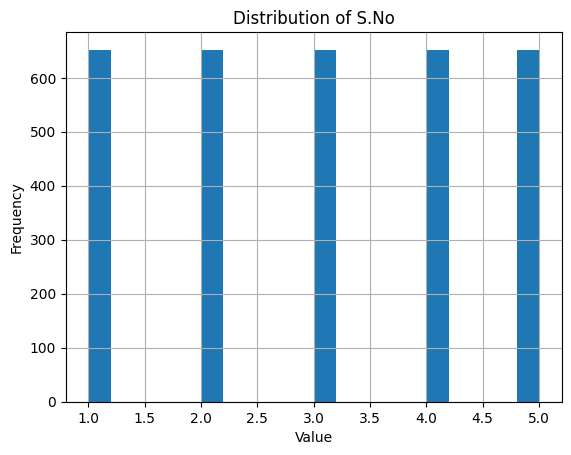

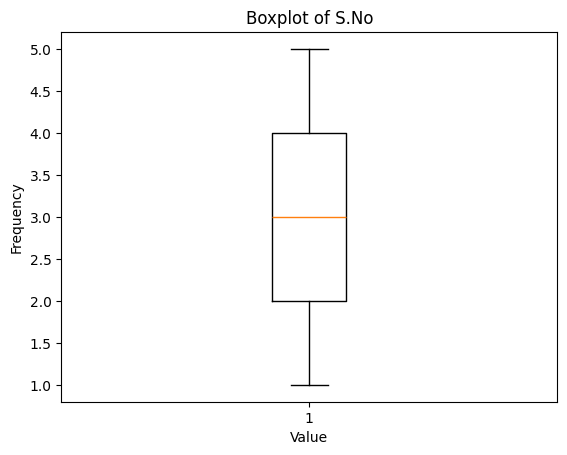

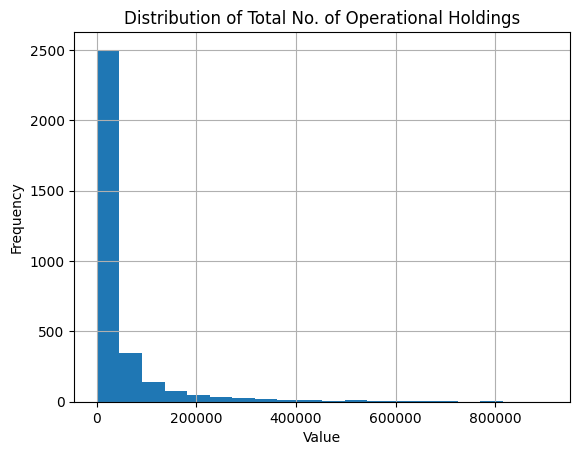

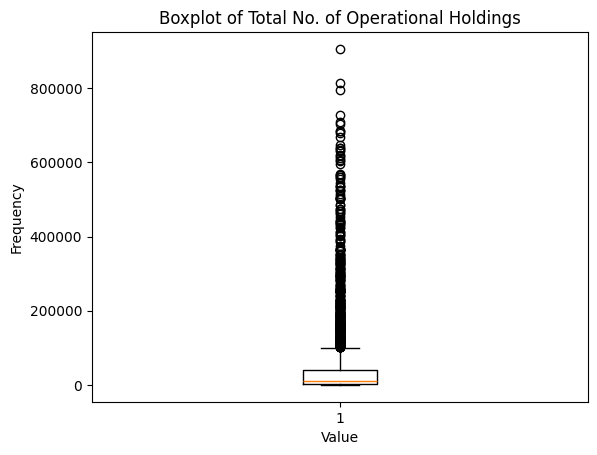

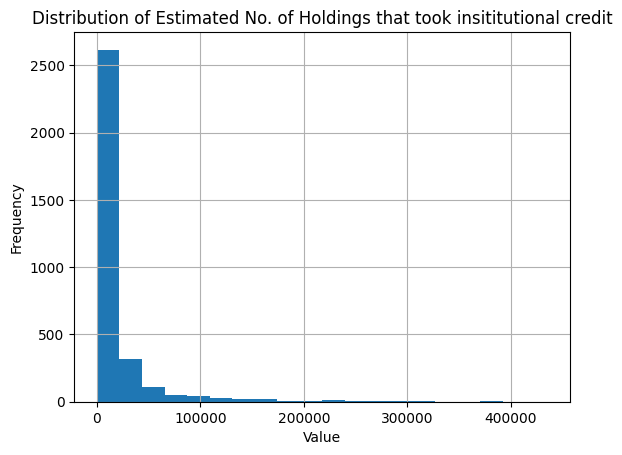

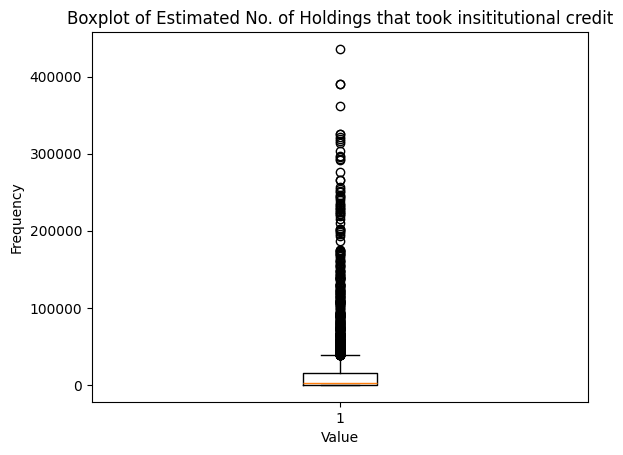

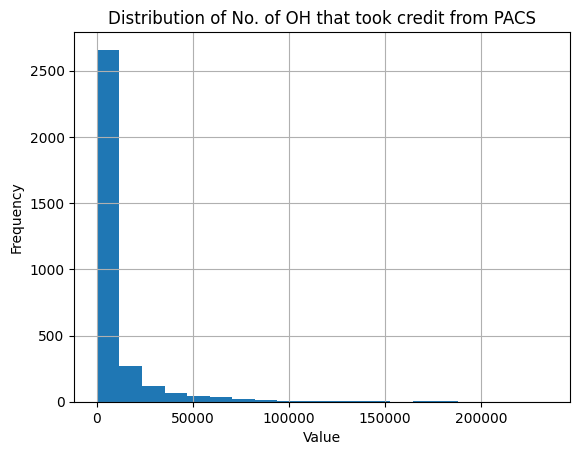

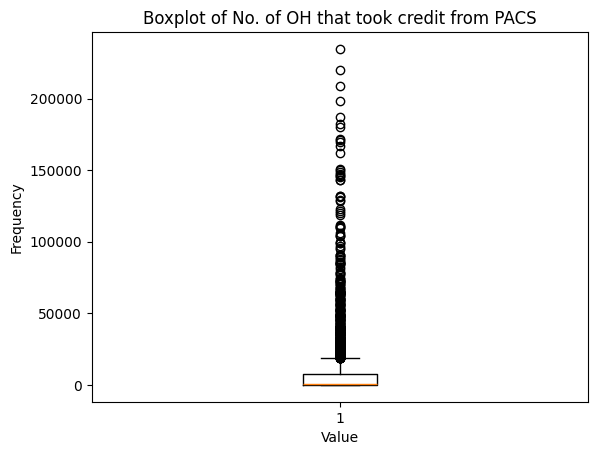

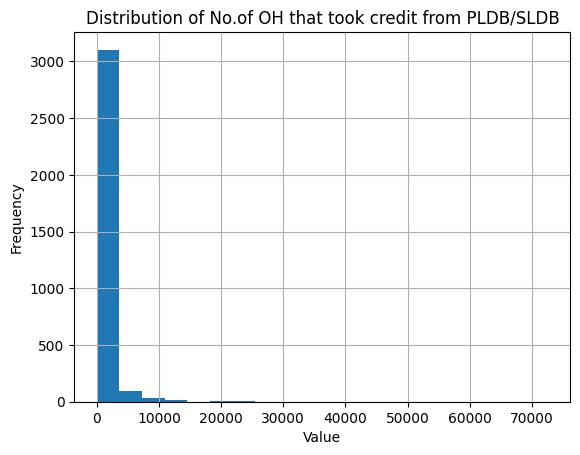

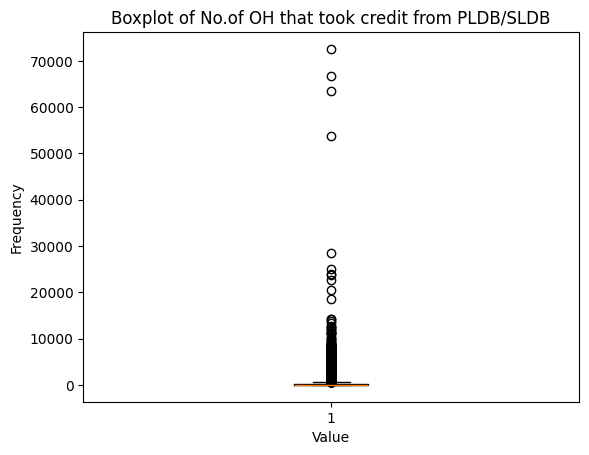

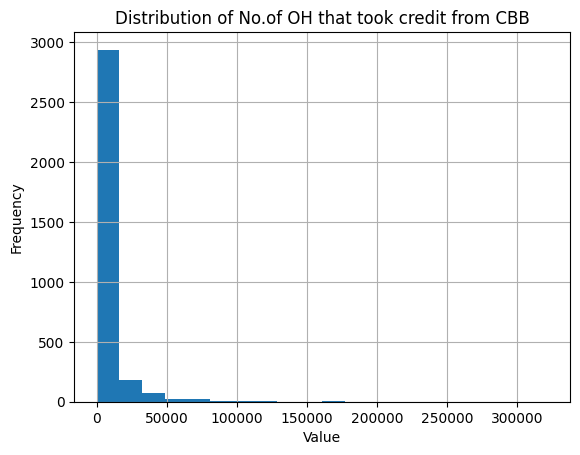

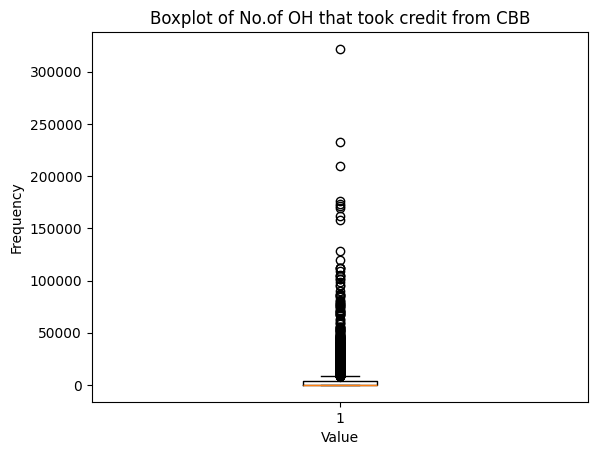

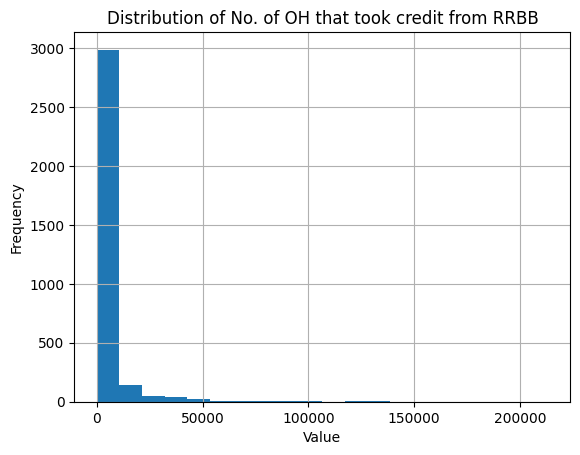

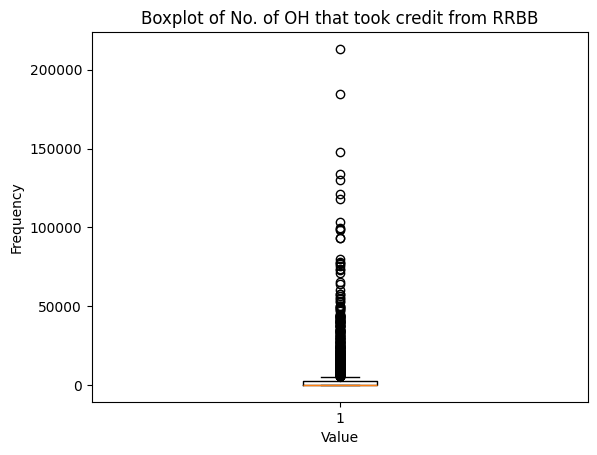

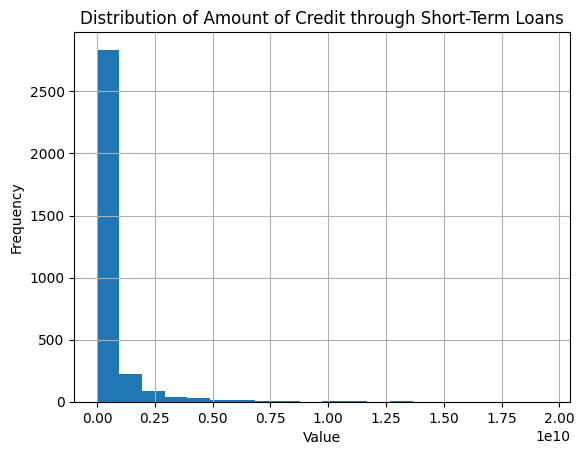

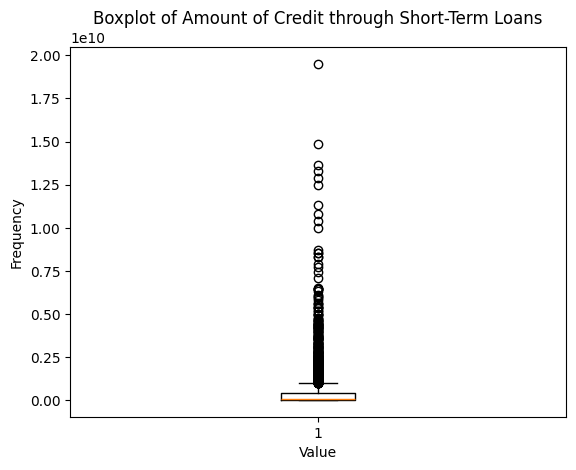

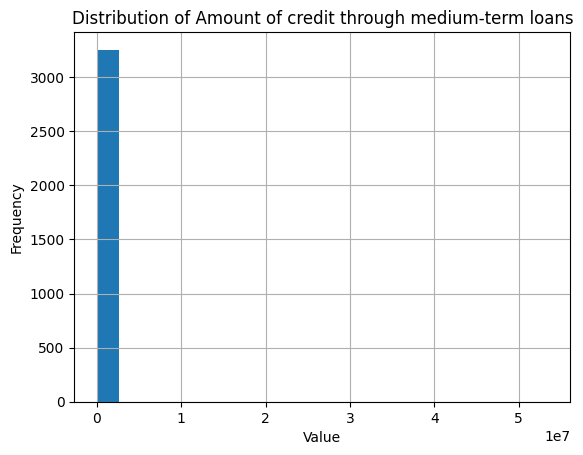

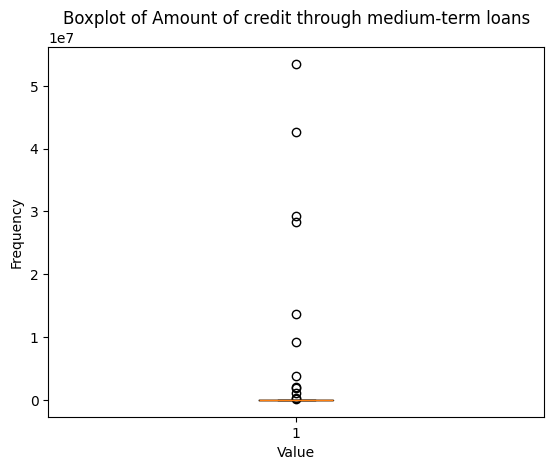

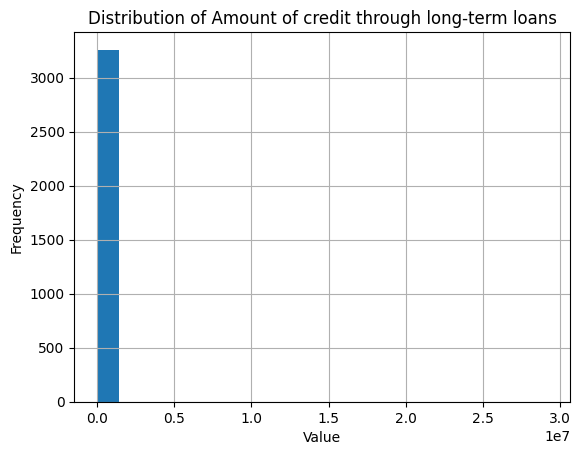

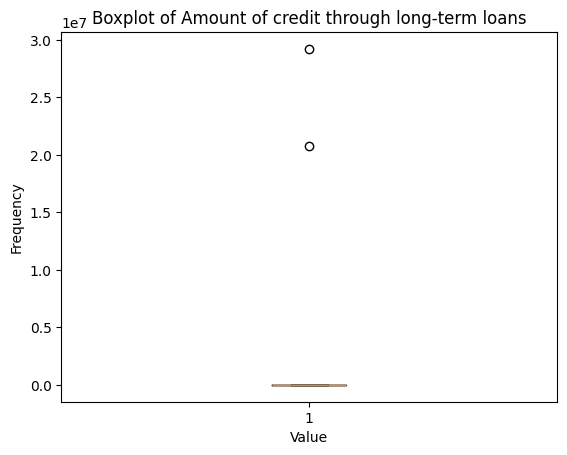

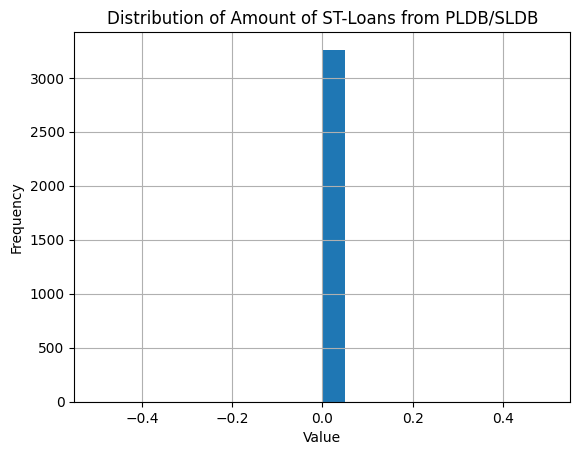

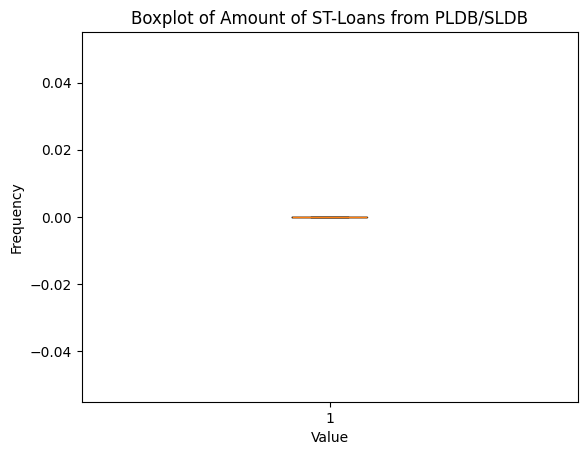

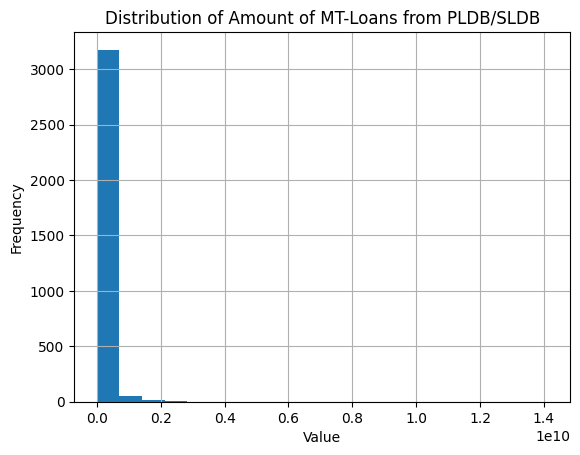

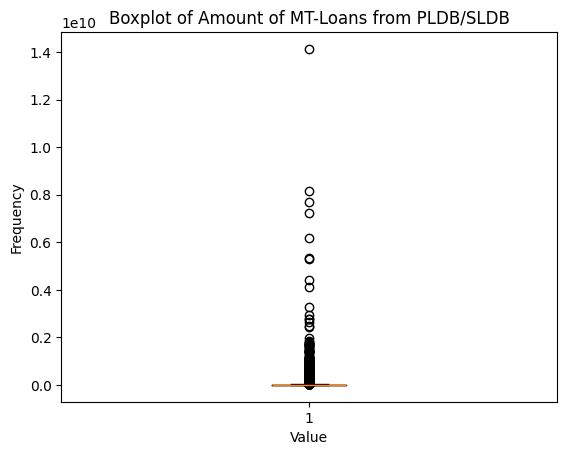

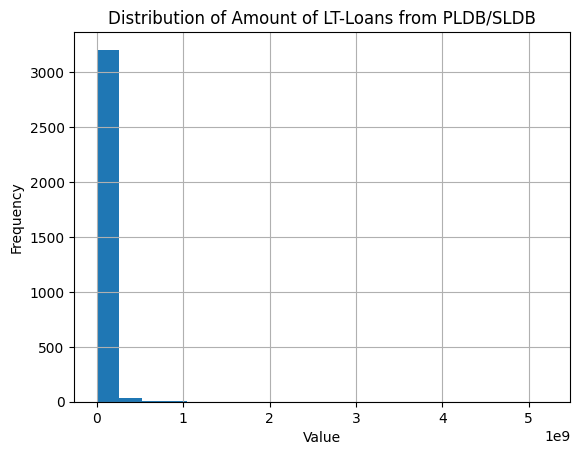

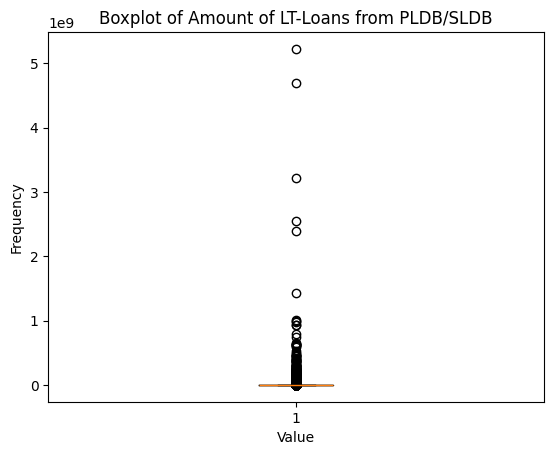

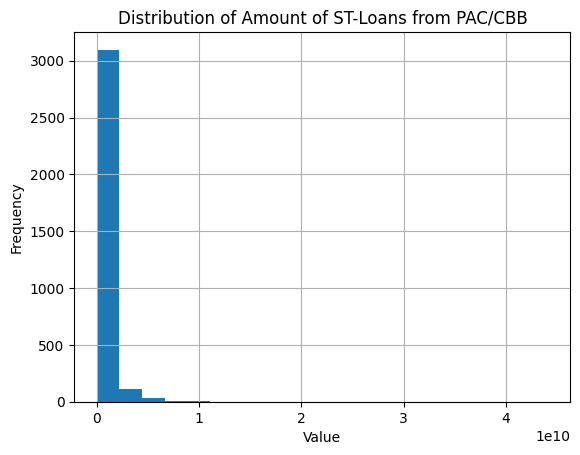

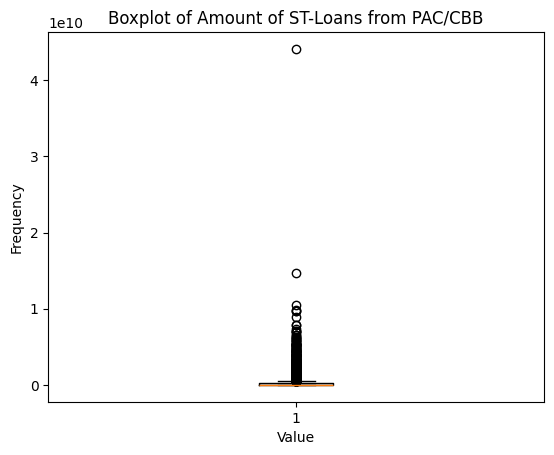

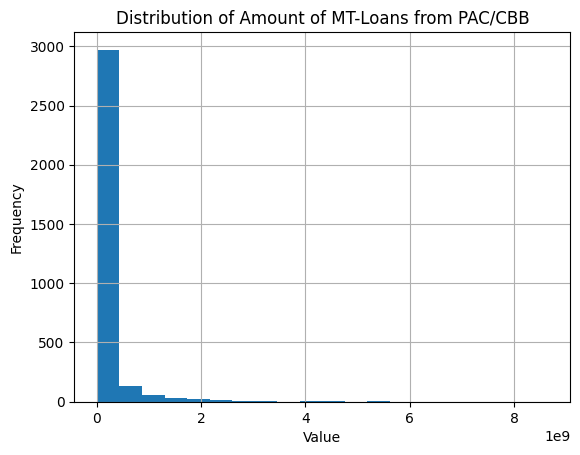

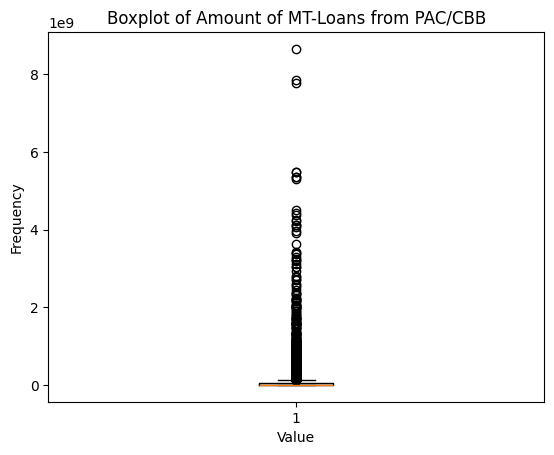

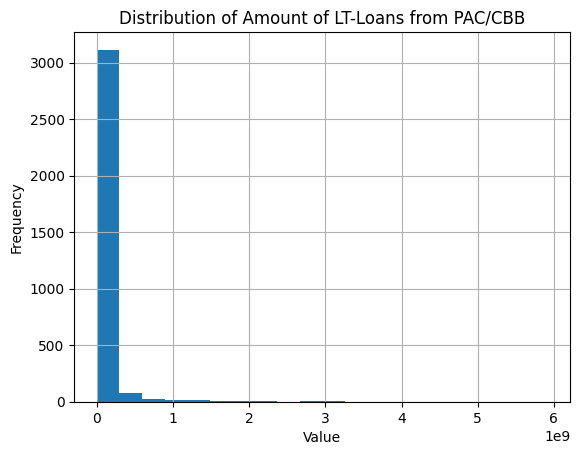

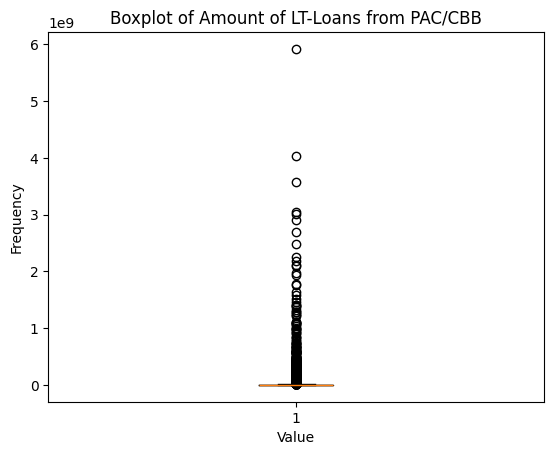

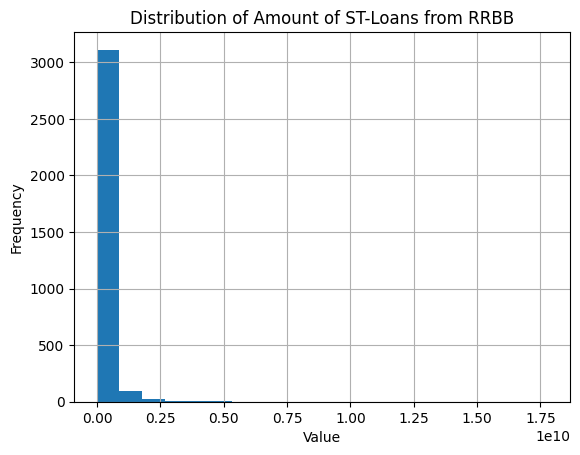

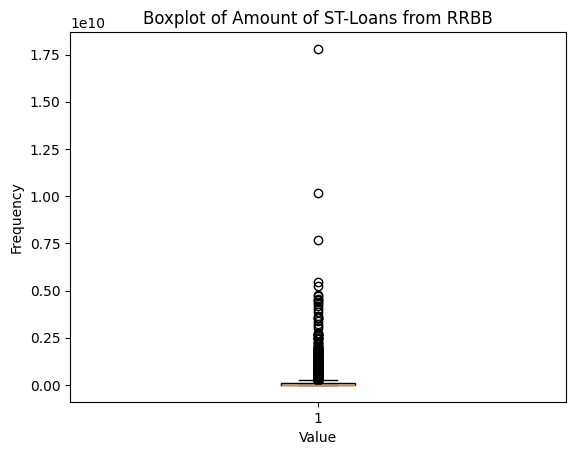

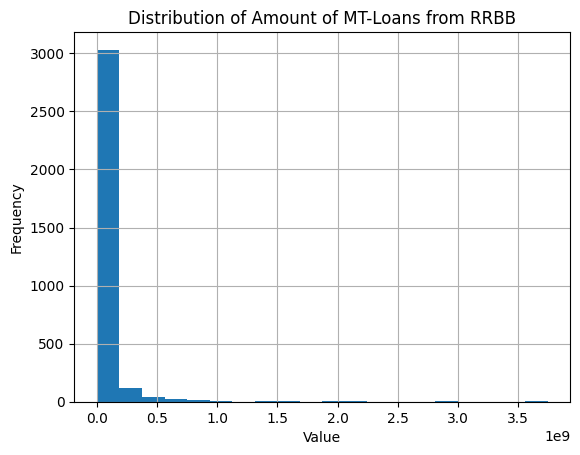

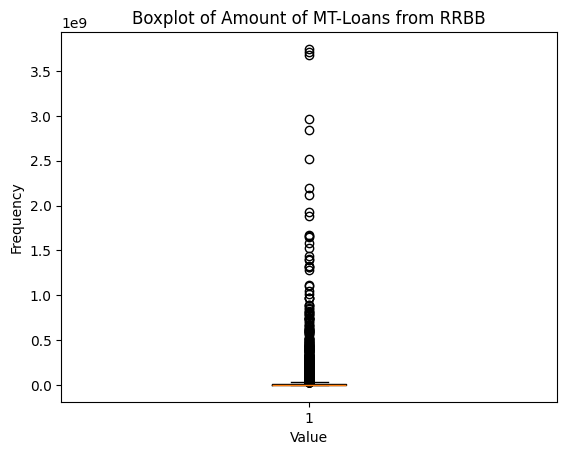

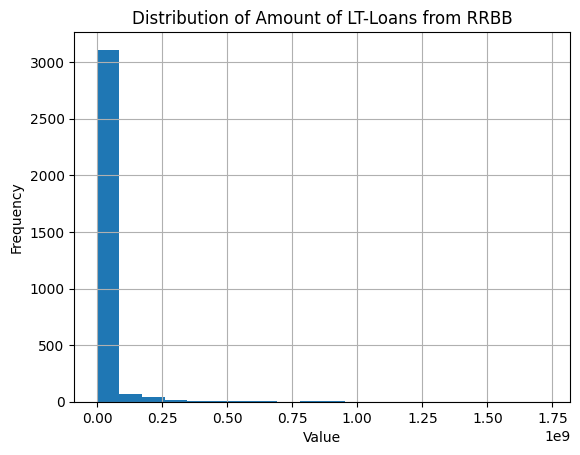

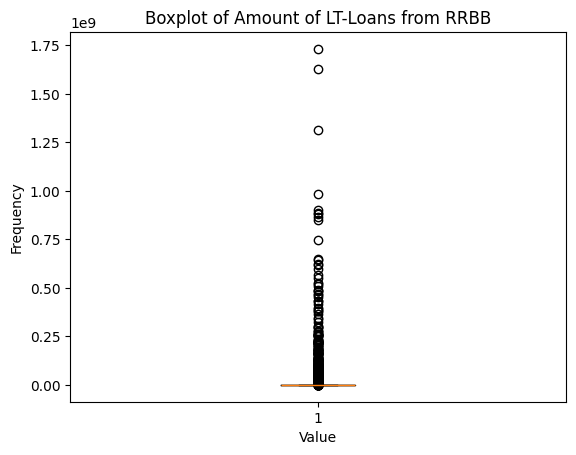

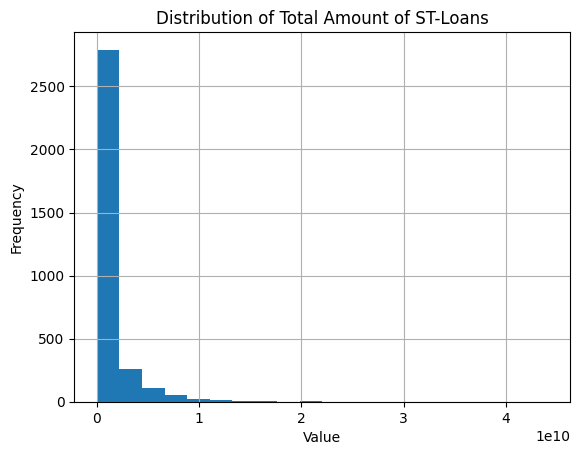

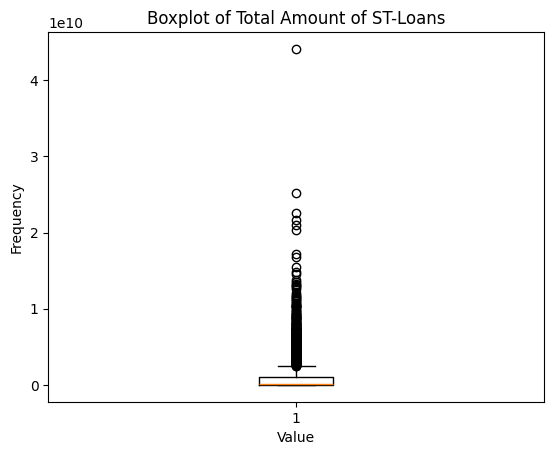

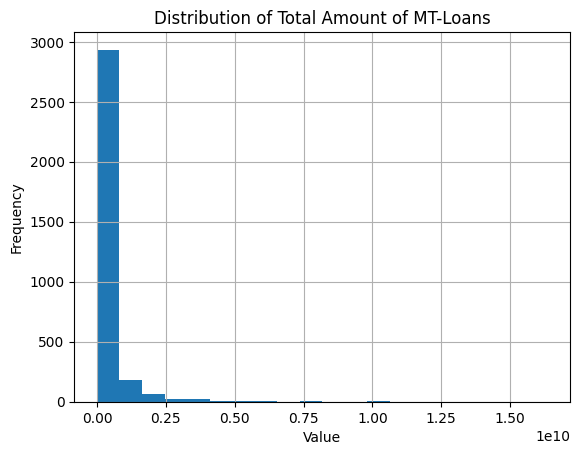

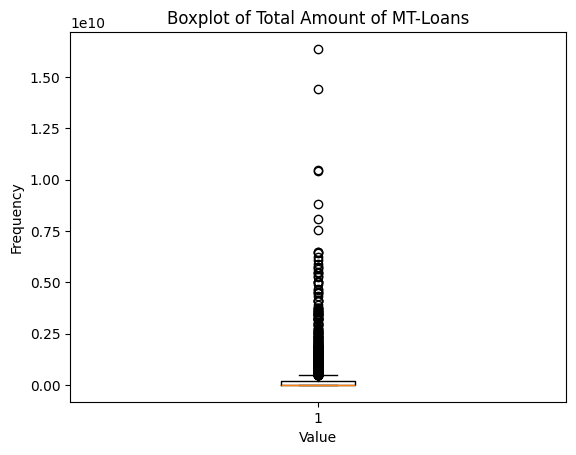

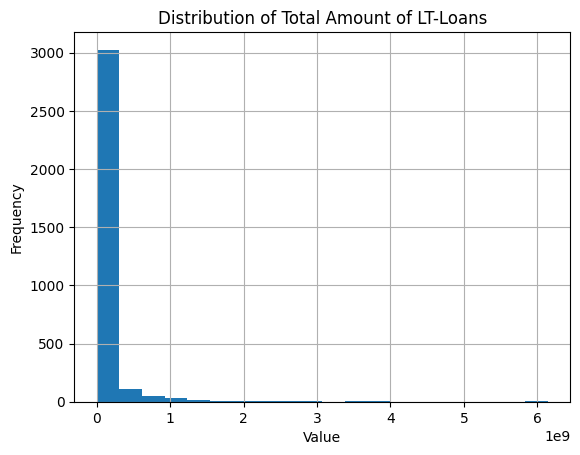

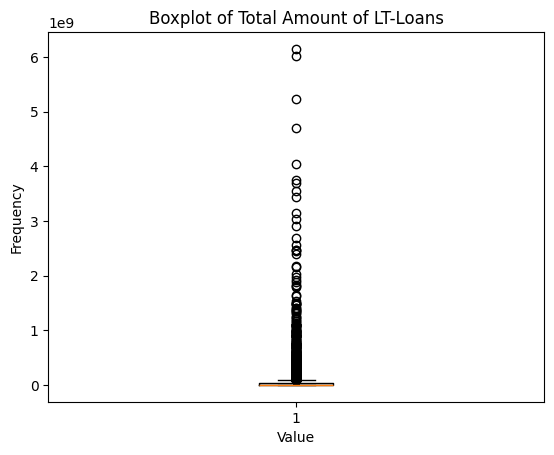

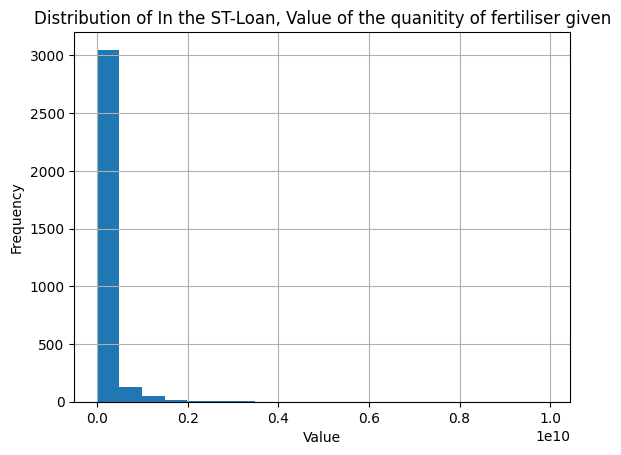

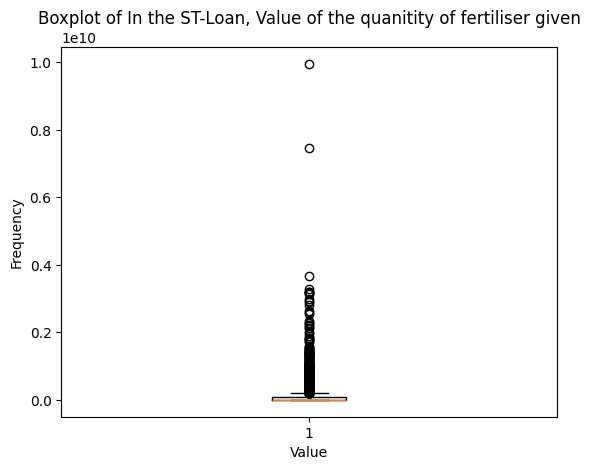

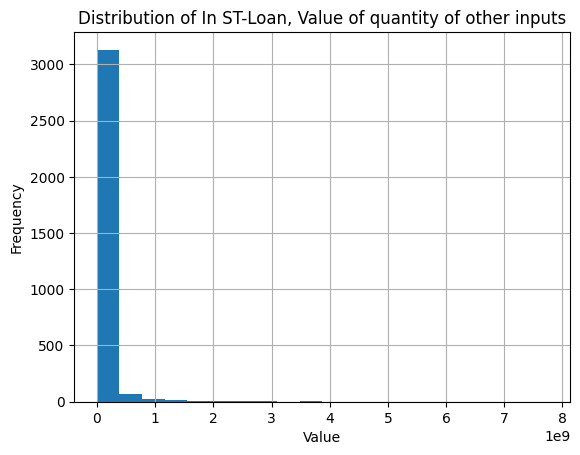

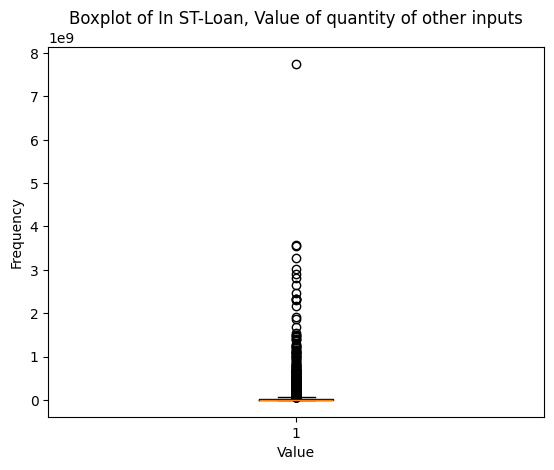

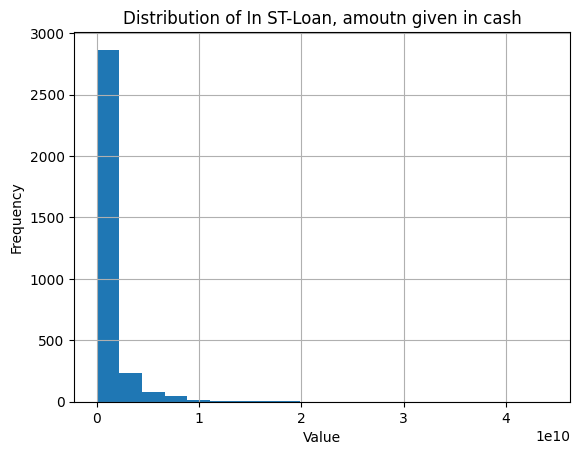

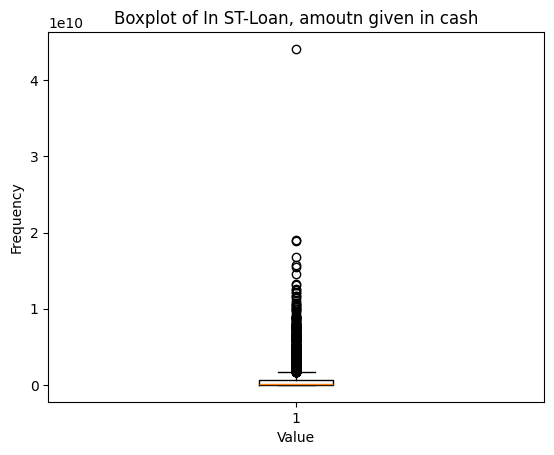

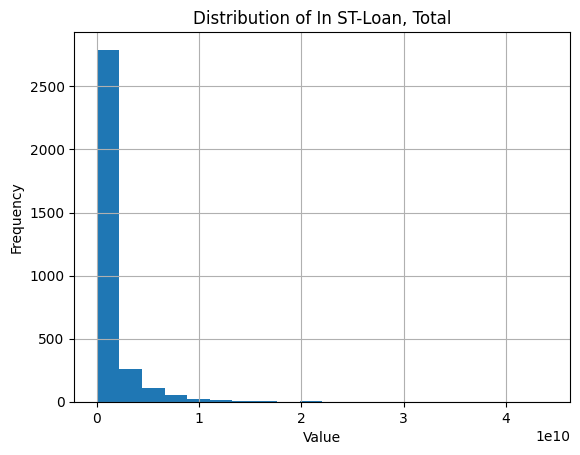

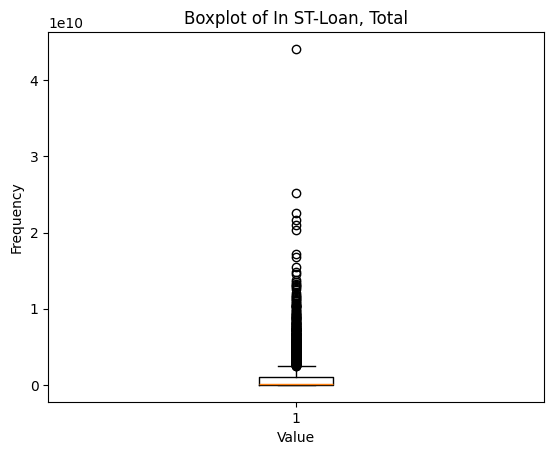

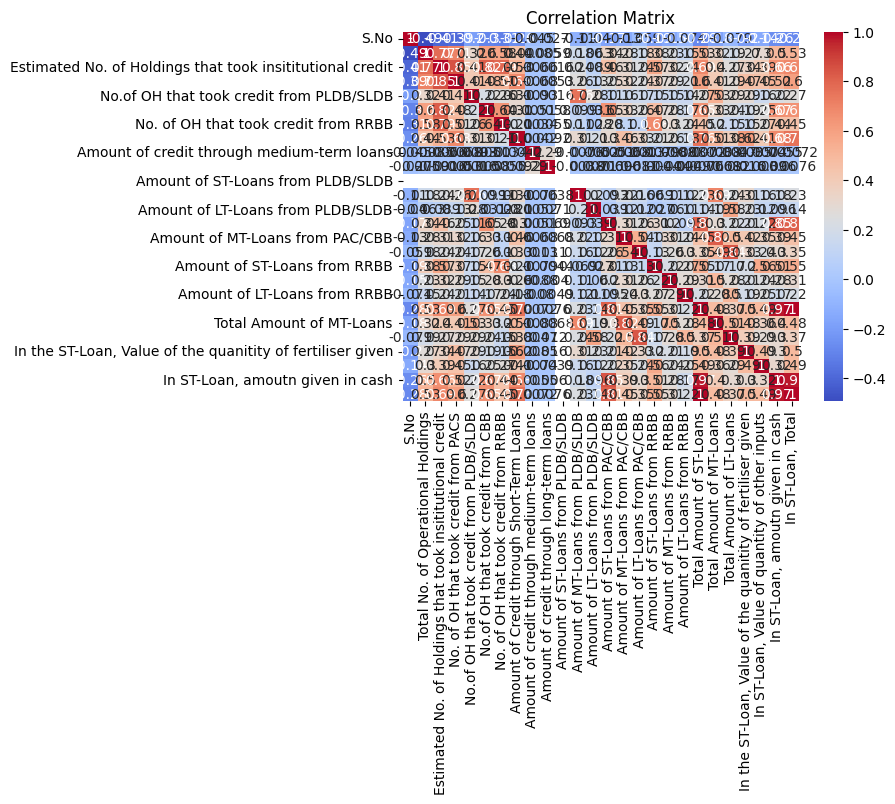

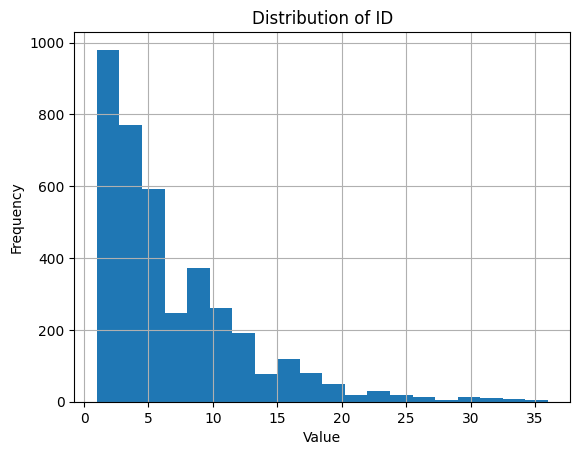

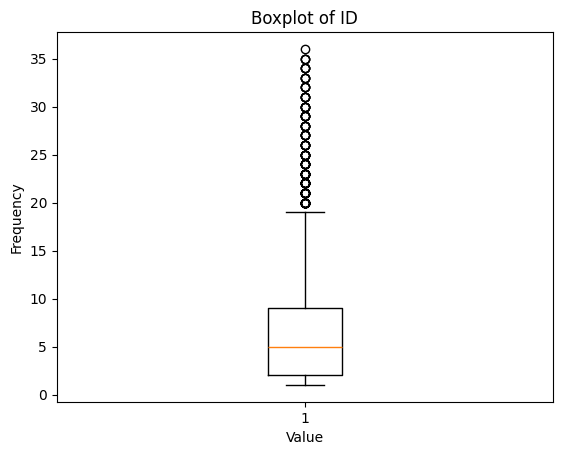

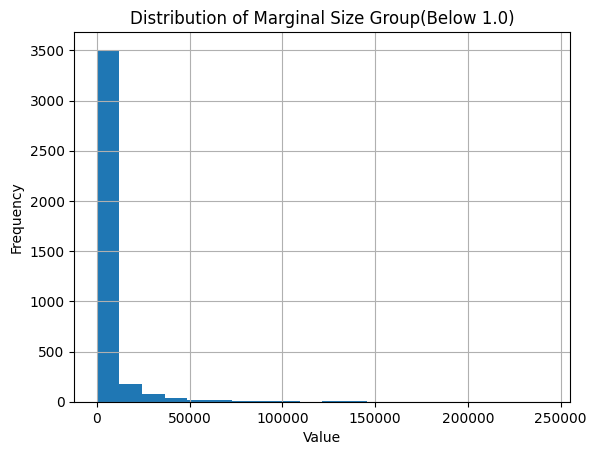

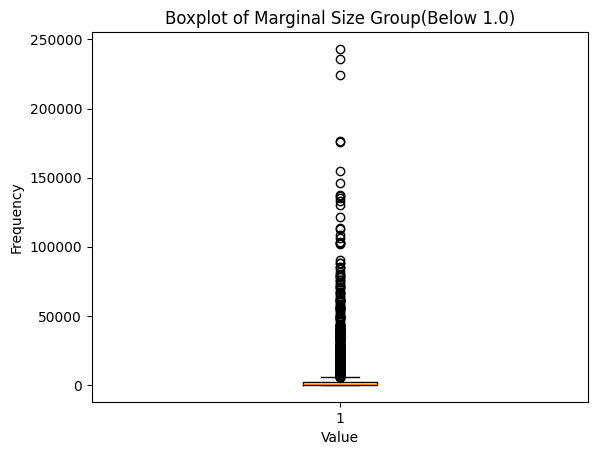

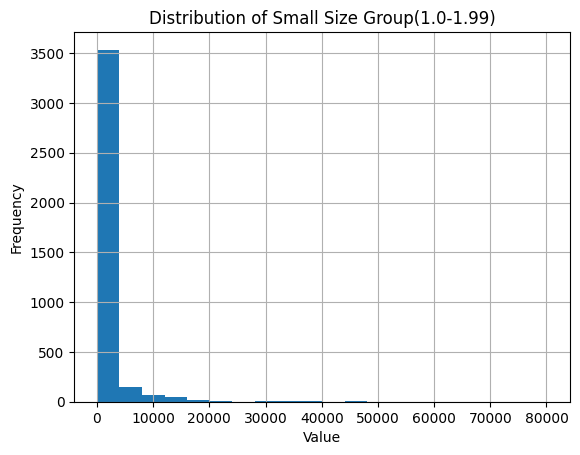

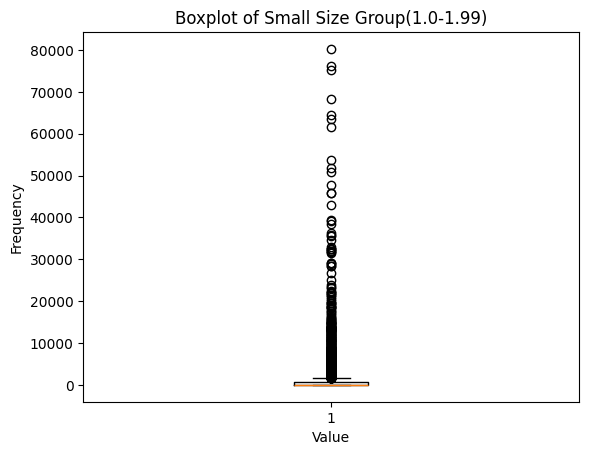

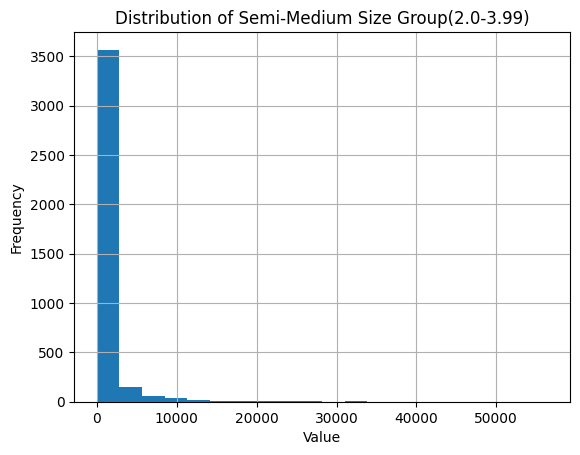

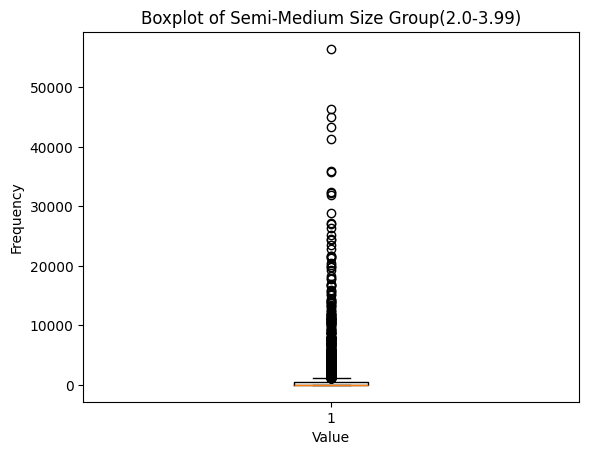

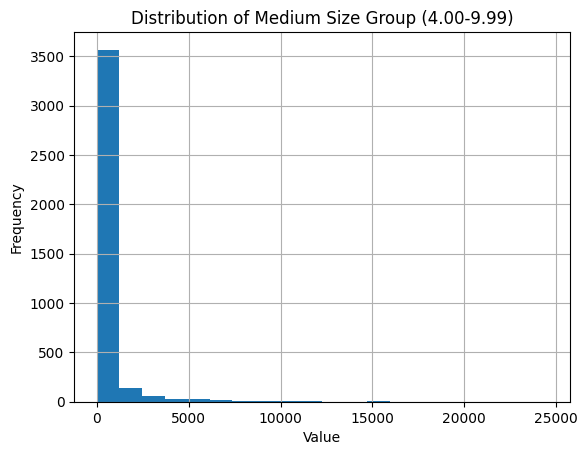

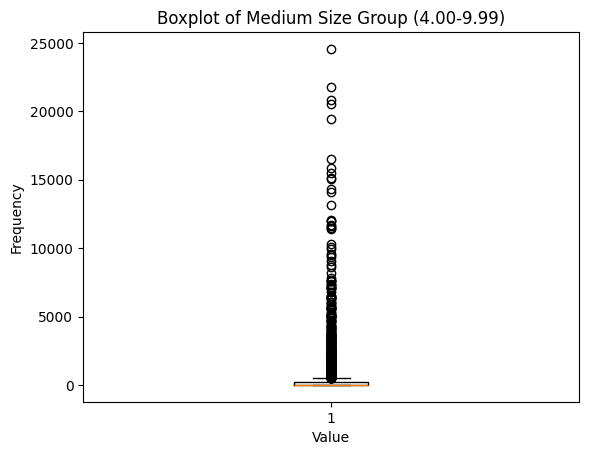

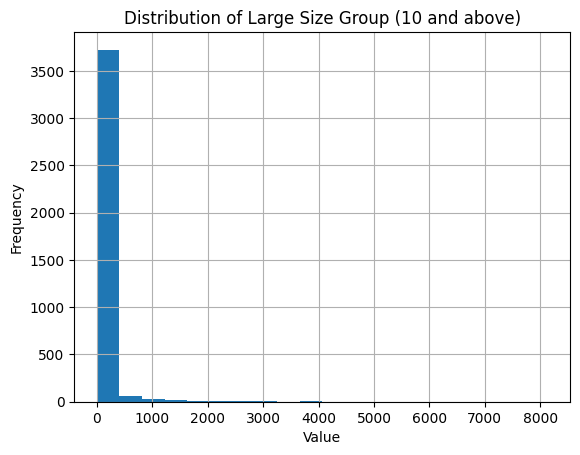

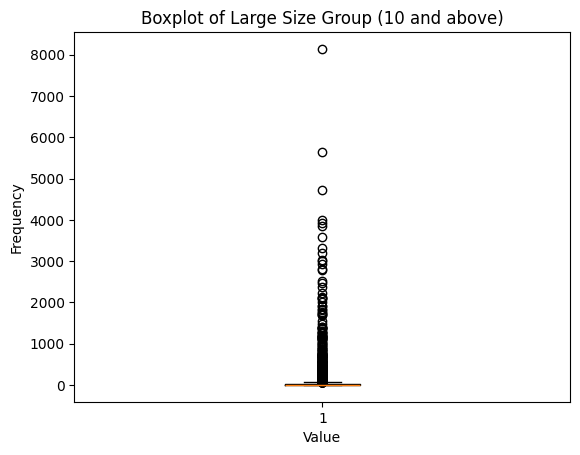

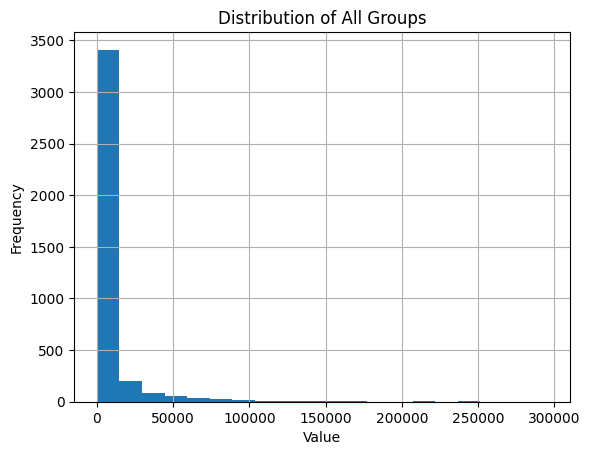

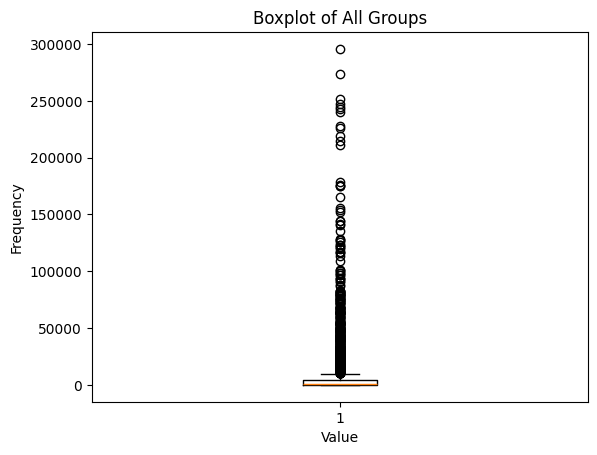

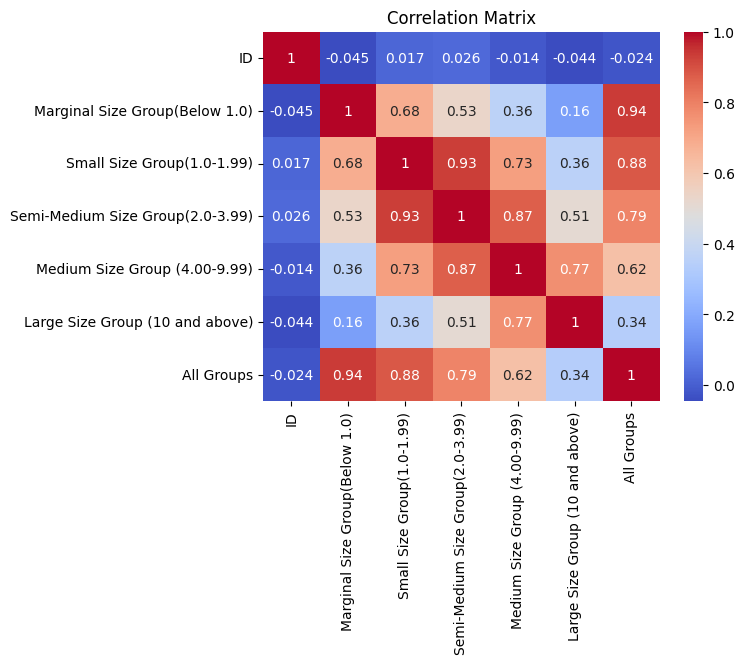

In [ ]:
for x in df:
  for y in x.columns:

    if (x[y]).dtype == 'object':
      continue
    #Histograms
    x[y].hist(bins = 20)
    plt.title(f"Distribution of {y}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

    #Boxplots
    plt.boxplot(x[y])
    plt.title(f"Boxplot of {y}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()


  correlation = x.corr(numeric_only=True)
  sns.heatmap(correlation, annot=True, cmap='coolwarm')
  plt.title("Correlation Matrix")
  plt.show()


In [ ]:
# df_1.to_csv('2006-07_table-8_cleaned.csv', index = False)
# df_2.to_csv('2006-07_table-9c_cleaned.csv', index = False)
# df_3.to_csv('2011-12_table-8_cleaned.csv', index = False)
# df_4.to_csv('2011-12_table-9c_cleaned.csv', index = False)
df_5.to_csv('2016-17_table-8_cleaned.csv', index = False)
df_6.to_csv('2016-17_table-9c_cleaned.csv', index = False)

Code for merging table 8 and table 9c files

In [ ]:
df_1 = pd.read_csv('/content/2006-07_table-8_cleaned.csv')
df_2 = pd.read_csv('/content/2011-12_table-8_cleaned.csv')
df_3 = pd.read_csv('/content/2016-17_table-8_cleaned.csv')


In [ ]:
df_merged = pd.concat([df_1,df_2,df_3],ignore_index=True)

In [ ]:
df_merged.head()
df_merged.shape

(9833, 31)

In [ ]:
df_merged = df_merged.sort_values(by=['State','District','Year'])

In [ ]:
df_merged.to_csv('merged_table_8.csv', index = False)

In [ ]:
df_new = pd.read_csv('/content/merged_table_8.csv')

In [ ]:
df_merged['Year'] = pd.to_numeric(df_merged['Year'], errors='coerce')

In [ ]:
df_new = df_new.sort_values(by=['State','District','Year'])
df_new

,State,District,Year,S.No,Size Group(HA),Total No. of Operational Holdings,Estimated No. of Holdings that took insititutional credit,No. of OH that took credit from PACS,No.of OH that took credit from PLDB/SLDB,No.of OH that took credit from CBB,...,Amount of MT-Loans from RRBB,Amount of LT-Loans from RRBB,Total Amount of ST-Loans,Total Amount of MT-Loans,Total Amount of LT-Loans,Total Loan (ST+MT+LT),"In the ST-Loan, Value of the quanitity of fertiliser given","In ST-Loan, Value of quantity of other inputs","In ST-Loan, amoutn given in cash","In ST-Loan, Total"
0,STATE : A & N ISLANDS,DISTRICT : NICOBAR,2011,1,MARGINAL (BELOW 1.0),92,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,STATE : A & N ISLANDS,DISTRICT : NICOBAR,2011,2,SMALL (1.0 - 1.99),30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,STATE : A & N ISLANDS,DISTRICT : NICOBAR,2011,3,SEMI-MEDIUM (2.0 - 3.99),63,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,STATE : A & N ISLANDS,DISTRICT : NICOBAR,2011,4,MEDIUM (4.0 - 9.99),243,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,STATE : A & N ISLANDS,DISTRICT : NICOBAR,2011,5,LARGE (10 AND ABOVE),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9828,STATE : WEST BENGAL,DISTRICT :SOUTH DINAJPUR,2016,1,MARGINAL (BELOW 1.0),172471,36584,34432,1537,307,...,15371500,0,564318508,21520100,7993180,593831788,209021657,61055598,294241253,564318508
9829,STATE : WEST BENGAL,DISTRICT :SOUTH DINAJPUR,2016,2,SMALL (1.0 - 1.99),36570,12758,10291,85,680,...,425250,0,323104950,2976750,0,326081700,157971870,11013975,154119105,323104950
9830,STATE : WEST BENGAL,DISTRICT :SOUTH DINAJPUR,2016,3,SEMI-MEDIUM (2.0 - 3.99),12926,5591,4810,0,120,...,2404800,0,170199720,2404800,0,172604520,89037720,21042000,60120000,170199720
9831,STATE : WEST BENGAL,DISTRICT :SOUTH DINAJPUR,2016,4,MEDIUM (4.0 - 9.99),705,409,364,0,0,...,0,0,18305700,0,0,18305700,10414920,3638400,4252380,18305700


In [ ]:
df_1 = pd.read_csv('/content/2006-07_table-9c_cleaned.csv')
df_2 = pd.read_csv('/content/2011-12_table-9c_cleaned.csv')
df_3 = pd.read_csv('/content/2016-17_table-9c_cleaned.csv')

In [ ]:
df_merged = pd.concat([df_1,df_2,df_3],ignore_index=True)

In [ ]:
df_merged = df_merged.sort_values(by=['State','District','Year'])

In [ ]:
df_merged.to_csv('merged_table_9c.csv', index = False)

fixing the 9c data

In [ ]:
hello = pd.read_csv('/content/9c_districts_with_all_years (1).csv')

In [ ]:
hello.head()

,State,District,Year,ID,Crop,Marginal Size Group(Below 1.0),Small Size Group(1.0-1.99),Semi-Medium Size Group(2.0-3.99),Medium Size Group (4.00-9.99),Large Size Group (10 and above),All Groups
0,STATE :A & N ISLANDS,north & middle andaman,2016,1,SUMMER PADDY,97,47,73,14,0,231
1,STATE :A & N ISLANDS,north & middle andaman,2016,2,KHARIF PADDY,65,94,91,14,0,264
2,STATE :A & N ISLANDS,north & middle andaman,2016,3,MOONG,0,0,18,0,0,18
3,STATE :A & N ISLANDS,north & middle andaman,2016,4,CHILLIES,0,0,55,14,0,69
4,STATE :A & N ISLANDS,north & middle andaman,2016,5,BETELNUTS (ARECANUTS),32,0,0,0,0,32


In [ ]:
hello.drop(['ID','Crop'],axis=1,inplace=True)

In [ ]:
hello.head()

,State,District,Year,Marginal Size Group(Below 1.0),Small Size Group(1.0-1.99),Semi-Medium Size Group(2.0-3.99),Medium Size Group (4.00-9.99),Large Size Group (10 and above),All Groups
0,STATE :A & N ISLANDS,north & middle andaman,2016,97,47,73,14,0,231
1,STATE :A & N ISLANDS,north & middle andaman,2016,65,94,91,14,0,264
2,STATE :A & N ISLANDS,north & middle andaman,2016,0,0,18,0,0,18
3,STATE :A & N ISLANDS,north & middle andaman,2016,0,0,55,14,0,69
4,STATE :A & N ISLANDS,north & middle andaman,2016,32,0,0,0,0,32


In [ ]:
hello.columns = ['State','District','Year','MARGINAL (BELOW 1.0)','SMALL (1.0 - 1.99)','SEMI-MEDIUM (2.0 - 3.99)','MEDIUM (4.0 - 9.99)','LARGE (10 AND ABOVE)','ALL GROUPS']

In [ ]:
melted = pd.melt(hello,
                 id_vars=['State', 'District','Year'],
                 value_vars=['MARGINAL (BELOW 1.0)','SMALL (1.0 - 1.99)','SEMI-MEDIUM (2.0 - 3.99)','MEDIUM (4.0 - 9.99)','LARGE (10 AND ABOVE)','ALL GROUPS'],
                 var_name='Size Group(HA)',
                 value_name='Total')

In [ ]:
melted.head()

,State,District,Year,Size Group(HA),Total
0,STATE :A & N ISLANDS,north & middle andaman,2016,MARGINAL (BELOW 1.0),97
1,STATE :A & N ISLANDS,north & middle andaman,2016,MARGINAL (BELOW 1.0),65
2,STATE :A & N ISLANDS,north & middle andaman,2016,MARGINAL (BELOW 1.0),0
3,STATE :A & N ISLANDS,north & middle andaman,2016,MARGINAL (BELOW 1.0),0
4,STATE :A & N ISLANDS,north & middle andaman,2016,MARGINAL (BELOW 1.0),32


In [ ]:
melted = melted.groupby(['State','District','Year','Size Group(HA)']).sum()
melted.head()

Total
State                District               Year Size Group(HA)                 
STATE :A & N ISLANDS north & middle andaman 2016 ALL GROUPS                 1315
                                                 LARGE (10 AND ABOVE)          0
                                                 MARGINAL (BELOW 1.0)        226
                                                 MEDIUM (4.0 - 9.99)         241
                                                 SEMI-MEDIUM (2.0 - 3.99)    564

In [ ]:
melted.to_csv('/content/fixed_9c_final.csv')

In [ ]:
c9 = pd.read_csv('/content/fixed_9c_final.csv')

In [ ]:
c9 = c9[c9['Size Group(HA)']!='ALL GROUPS']

In [ ]:
c9.head()

,State,District,Year,Size Group(HA),Total
1,STATE :A & N ISLANDS,north & middle andaman,2016,LARGE (10 AND ABOVE),0
2,STATE :A & N ISLANDS,north & middle andaman,2016,MARGINAL (BELOW 1.0),226
3,STATE :A & N ISLANDS,north & middle andaman,2016,MEDIUM (4.0 - 9.99),241
4,STATE :A & N ISLANDS,north & middle andaman,2016,SEMI-MEDIUM (2.0 - 3.99),564
5,STATE :A & N ISLANDS,north & middle andaman,2016,SMALL (1.0 - 1.99),284


In [ ]:
finalle = pd.read_csv('/content/8_districts_with_all_years.csv')

In [ ]:
finalle.drop('State',axis=1,inplace=True)

In [ ]:
finalle = finalle.merge(melted,on=['District','Year','Size Group(HA)'])

In [ ]:
finalle.head()

,District,Year,S.No,Size Group(HA),Total No. of Operational Holdings,Estimated No. of Holdings that took insititutional credit,No. of OH that took credit from PACS,No.of OH that took credit from PLDB/SLDB,No.of OH that took credit from CBB,No. of OH that took credit from RRBB,...,Amount of LT-Loans from RRBB,Total Amount of ST-Loans,Total Amount of MT-Loans,Total Amount of LT-Loans,Total Loan (ST+MT+LT),"In the ST-Loan, Value of the quanitity of fertiliser given","In ST-Loan, Value of quantity of other inputs","In ST-Loan, amoutn given in cash","In ST-Loan, Total",Total
0,north & middle andamans,2011,1,MARGINAL (BELOW 1.0),2033,1072,197,0,875,0,...,0,10164999,14278182,11176671,35619852,0,0,10164999,10164999,28
1,north & middle andamans,2011,2,SMALL (1.0 - 1.99),1050,384,119,0,265,0,...,0,4499050,3498573,3149268,11146891,0,0,4499050,4499050,13
2,north & middle andamans,2011,3,SEMI-MEDIUM (2.0 - 3.99),1742,181,18,0,163,0,...,0,362916,2995804,4199272,7557992,181458,90729,90729,362916,18
3,north & middle andamans,2011,4,MEDIUM (4.0 - 9.99),1186,124,0,0,107,17,...,0,898484,2302816,2929581,6130881,0,0,898484,898484,17
4,north & middle andamans,2011,5,LARGE (10 AND ABOVE),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
finalle.to_csv('/content/finally.csv',index=False)